<center><h2> van der Pol Oscillator </h2></center>

""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"<br>
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).<br>
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. Please respect copyright & acknowledge our work."""

Numerical solution of  van der Pol equation:
$$
\frac{d^2x}{dt^2} + \mu(x^2-x_0^2)\frac{dx}{dt} +\omega_0^2x=0
$$ 

<IPython.core.display.Javascript object>


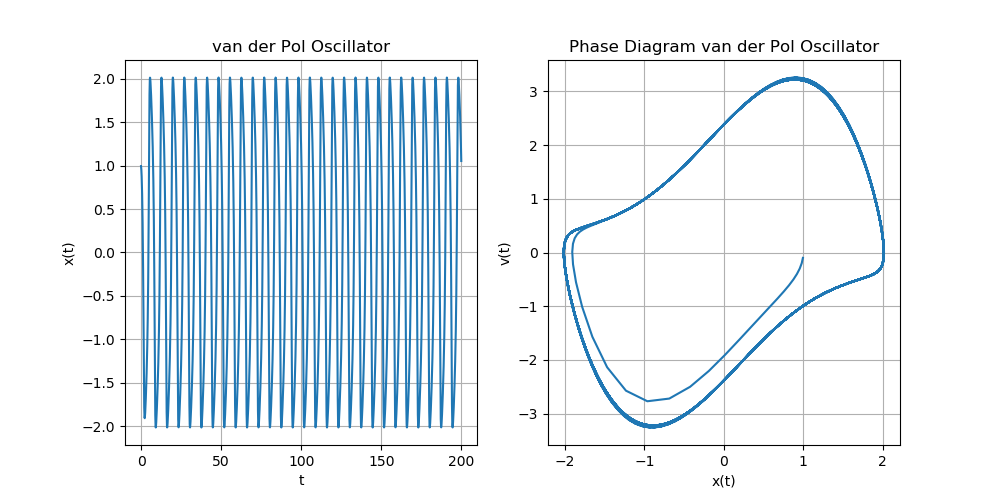

In [2]:
# vanDerPol.py: Numerical solution of van der Pol equation

% matplotlib notebook

import numpy as np
import matplotlib.pylab as plt  
from math import *

tt = np.zeros((2000),float)            # time
yy = np.zeros((2000),float)            # position
vy = np.zeros((2000),float)            # velocity
mu = 1.53                              #  damping
x0 = 1
w0 = 1.0                                 # frequency
F = 0
w = 1

def f(t,y):                          # RHS of equation
    rhs = [0]*(2)                      
    rhs[0] = y[1]
    rhs[1] = -mu*(y[0]**2-x0**2)*y[1]-w0**2*y[0]+F*sin(w*t)
    return rhs
    
def rk4(t,h,y,n):          # Runge-Kutta 4 (t, step,y,dimension)
    k1 = [0.]*(n+1)
    k2 = [0.]*(n+1)
    k3 = [0.]*(n+1)
    k4 = [0.]*(n+1)
    fR = [0.]*(n+1)
    ydumb = [0.]*(n+1)
    fR = f(t, y)                  # function returns rhs
    for i in range(0,n+1): k1[i]  =  h*fR[i]                   
    for i in range(0, n+1):  ydumb[i]  =  y[i] + k1[i]/2.
    fR = f(t + h/2.,ydumb)
    for i in range(0, n+1):
        k2[i] = h*fR[i]
        ydumb[i]  =  y[i] + k2[i]/2.    
    fR = f(t + h/2., ydumb)
    for i in range(0, n+1):
        k3[i] = h*fR[i]
        ydumb[i]  =  y[i] + k3[i] 
    fR = f(t + h, ydumb) 
    for i in range(0, n+1): k4[i] = h*fR[i]
    for i in range(0, n+1): y[i]  =  y[i] + (k1[i] +2.*(k2[i] +k3[i]) +k4[i])/6.  
    return y       # returs y[0]=position,  y[1]= velocity

y = [0]*(2)     # array for 2 values initial conditions
y[0] = 1.0      # initial position
y[1] =  0       # initial velocity

f(0.0,y)        # initial function  
dt = 0.1        # small time
i = 0           # for array 

for t in np.arange(0,200,dt): # this makes 2000 times    
    tt[i] = t
    y = rk4(t,dt,y,1)     
    yy[i] =  y[0]        #  positions
    vy[i] = y[1]         #  velocities
    i = i+1

fig, axes  =  plt.subplots(nrows=1, ncols=2, figsize=(10,5))   
axes[0].plot(tt,yy)             
axes[0].grid()                                 # position vs time
axes[0].set_title('van der Pol Oscillator')        # left figure
axes[0].set_xlabel('t')
axes[0].set_ylabel('x(t)')
axes[1].plot(yy,vy)           # right figure phase diagram
axes[1].grid()
axes[1].set_title('Phase Diagram van der Pol Oscillator')  
axes[1].set_xlabel('x(t)')
axes[1].set_ylabel('v(t)')      
plt.show()